### imports

In [1]:
import json
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
import json
import exifread
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import env
from utils import KaggleCameraDataset, progress_iter, RNG

%matplotlib inline
%load_ext autoreload
%autoreload 2

### `N_IMAGES_NEEDED`

In [2]:
MAX_IMAGES = 5000
N_IMAGES = [991, 651, 767, 773, 595, 873, 1490, 751, 888, 1068]
N_IMAGES = [x+y for x, y in zip(N_IMAGES, [198-30, 126-30, 237-30, 232-32, 229-30, 236-30, 249-30, 209-30, 214-33, 228-30])]
N_IMAGES_NEEDED = [5000-x for x in N_IMAGES]
N_IMAGES_NEEDED

[3841, 4253, 4026, 4027, 4206, 3921, 3291, 4070, 3931, 3734]

## some routines

In [3]:
def jpg_quality(filepath):
    bash_cmd = "identify -verbose {0} | grep Quality".format(filepath)
    process = subprocess.Popen(bash_cmd.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    output = filter(lambda s: 'Quality' in s, output.split('\n'))
    if not output: 
        return None
    return int(filter(lambda c: c.isdigit(), output[0]))

In [4]:
list(enumerate(KaggleCameraDataset.target_labels()))

[(0, 'HTC-1-M7'),
 (1, 'LG-Nexus-5x'),
 (2, 'Motorola-Droid-Maxx'),
 (3, 'Motorola-Nexus-6'),
 (4, 'Motorola-X'),
 (5, 'Samsung-Galaxy-Note3'),
 (6, 'Samsung-Galaxy-S4'),
 (7, 'Sony-NEX-7'),
 (8, 'iPhone-4s'),
 (9, 'iPhone-6')]

In [5]:
def resolutions(): # with all possible rotations
    return [
        [(1520, 2688), (2688, 1520)], # 0
        [(3024, 4032), (4032, 3024)], # 1
        [(2432, 4320), (4320, 2432)], # 2
        [(1040, 780), (3088, 4130), (4130, 3088), (3120, 4160), (4160, 3120)], # 3
        [(3120, 4160), (4160, 3120), (4160, 2340)], # 4
        [(4128, 2322)], # 5
        [(4128, 2322)], # 6
        [(6000, 4000)], # 7
        [(3264, 2448)], # 8
        [(3264, 2448)], # 9
    ]

### load data

In [6]:
andreas_data = KaggleCameraDataset('../data/andreas/', train=True)

## stats

In [7]:
def make_stats(dataset, c=None, partial_stats=None):
    x_fpaths = dataset.X
    stats = partial_stats or {}
    for i in progress_iter(range(len(dataset)), verbose=True):
        try:
            if c is not None and dataset.y[i] != c:
                continue
            if partial_stats is not None and x_fpaths[i] in map(lambda d: d['x_fpath'], stats.values()):
                continue
            x, y = dataset[i]
            x = np.asarray(x, dtype=np.uint8)
            if len(x.shape) != 3 or x.shape[0] < 1024 or x.shape[1] < 1024:
                continue
            d = {}
            d['x_fpath'] = x_fpaths[i]
            d['y'] = y
            d['res'] = (x.shape[0], x.shape[1])
            d['res_valid'] = d['res'] in resolutions()[y]
            d['quality'] = 95 # jpg_quality(x_fpaths[i])
            stats[i] = d
        except:
            pass
    return stats

### class 1 Nexus 5 stats

In [ ]:
andreas_stats_1 = make_stats(andreas_data, c=1)

In [ ]:
print len(andreas_stats_1)
print min(map(lambda d: d['quality'], andreas_stats_1.values()))
print sum(map(lambda d: d['res_valid'], andreas_stats_1.values()))

In [ ]:
# with open('../data/andreas_stats_1.json', 'w') as f:
#     json.dump(andreas_stats_1, f, indent=4, sort_keys=True)
with open('../data/andreas_stats_1.json') as f:
    andreas_stats_1 = json.load(f)

### class 0 (HTC)

In [ ]:
andreas_stats_0 = make_stats(andreas_data, 0, andreas_stats_0)

In [ ]:
print len(andreas_stats_0)
print min(map(lambda d: d['quality'], andreas_stats_0.values()))
print sum(map(lambda d: d['res_valid'], andreas_stats_0.values()))

In [ ]:
# with open('../data/andreas_stats_0.json', 'w') as f:
#     json.dump(andreas_stats_0, f, indent=4, sort_keys=True)
with open('../data/andreas_stats_0.json') as f:
    andreas_stats_0 = json.load(f)

### class 9 (iPhone 6)

In [ ]:
andreas_stats_9 = make_stats(andreas_data, 9, andreas_stats_9)

In [ ]:
print len(andreas_stats_9)
print min(map(lambda d: d['quality'], andreas_stats_9.values()))
print sum(map(lambda d: d['res_valid'], andreas_stats_9.values()))

In [ ]:
# with open('../data/andreas_stats_9.json', 'w') as f:
#     json.dump(andreas_stats_9, f, indent=4, sort_keys=True)
with open('../data/andreas_stats_9.json') as f:
    andreas_stats_9 = json.load(f)

### class 2 (Droid Maxx)

In [126]:
andreas_stats_2 = make_stats(andreas_data, 2)

A Jupyter Widget

In [128]:
print len(andreas_stats_2)
print min(map(lambda d: d['quality'], andreas_stats_2.values()))
print sum(map(lambda d: d['res_valid'], andreas_stats_2.values()))

5660
85
5660


In [8]:
# with open('../data/andreas_stats_2.json', 'w') as f:
#     json.dump(andreas_stats_2, f, indent=4, sort_keys=True)
with open('../data/andreas_stats_2.json') as f:
    andreas_stats_2 = json.load(f)

### class 8 (iPhone 4S)

In [133]:
andreas_stats_8 = make_stats(andreas_data, 8)

A Jupyter Widget

9098/|/ 58%|| 9098/15691 [00:20<00:14, 454.10it/s]


In [8]:
print len(andreas_stats_8)
print min(map(lambda d: d['quality'], andreas_stats_8.values()))
print sum(map(lambda d: d['res_valid'], andreas_stats_8.values()))

# with open('../data/andreas_stats_8.json', 'w') as f:
#     json.dump(andreas_stats_8, f, indent=4, sort_keys=True)
with open('../data/andreas_stats_8.json') as f:
    andreas_stats_8 = json.load(f)

6575
None
1803


### class 6 (S4)

In [136]:
andreas_stats_6 = make_stats(andreas_data, 6)

A Jupyter Widget

5663/|/ 22%|| 5663/25514 [00:20<01:10, 281.75it/s]


In [22]:
# print len(andreas_stats_6)
# print min(map(lambda d: d['quality'], andreas_stats_6.values()))
# print sum(map(lambda d: d['res_valid'], andreas_stats_6.values()))

# with open('../data/andreas_stats_6.json', 'w') as f:
#     json.dump(andreas_stats_6, f, indent=4, sort_keys=True)
with open('../data/andreas_stats_6.json') as f:
    andreas_stats_6 = json.load(f)

### class 3

In [6]:
# andreas_stats_3 = make_stats(andreas_data, 3)

# print len(andreas_stats_3)
# print min(map(lambda d: d['quality'], andreas_stats_3.values()))
# print sum(map(lambda d: d['res_valid'], andreas_stats_3.values()))

# with open('../data/andreas_stats_3.json', 'w') as f:
#     json.dump(andreas_stats_3, f, indent=4, sort_keys=True)
with open('../data/andreas_stats_3.json') as f:
    andreas_stats_3 = json.load(f)

### class 5

In [18]:
# andreas_stats_5 = make_stats(andreas_data, 5)

# print len(andreas_stats_5)
# print min(map(lambda d: d['quality'], andreas_stats_5.values()))
# print sum(map(lambda d: d['res_valid'], andreas_stats_5.values()))

# with open('../data/andreas_stats_5.json', 'w') as f:
#     json.dump(andreas_stats_5, f, indent=4, sort_keys=True)
with open('../data/andreas_stats_5.json') as f:
    andreas_stats_5 = json.load(f)

### class 7

In [8]:
andreas_stats_7 = make_stats(andreas_data, 7)

print len(andreas_stats_7)
print min(map(lambda d: d['quality'], andreas_stats_7.values()))
print sum(map(lambda d: d['res_valid'], andreas_stats_7.values()))

with open('../data/andreas_stats_7.json', 'w') as f:
    json.dump(andreas_stats_7, f, indent=4, sort_keys=True)
with open('../data/andreas_stats_7.json') as f:
    andreas_stats_7 = json.load(f)

A Jupyter Widget


2076
95
205


# filter according to quality

In [ ]:
QUALITY_THRESHOLD = 93 # 95 !!!

### class 1

In [ ]:
train_1 = []
for i, d in sorted(andreas_stats_1.items()):
    if d['quality'] and d['quality'] >= QUALITY_THRESHOLD:
        train_1.append((d['x_fpath'], d['y'], d['quality'], d['res'], d['res_valid']))
print len(train_1)

### class 0

In [ ]:
train_0 = []
for i, d in sorted(andreas_stats_0.items()):
    if d['quality'] and d['quality'] >= 95: # QUALITY_THRESHOLD:
        train_0.append((d['x_fpath'], d['y'], d['quality'], d['res'], d['res_valid']))
print len(train_0)

### class 9

In [ ]:
train_9 = []
for i, d in sorted(andreas_stats_9.items()):
    if d['quality'] and d['quality'] >= QUALITY_THRESHOLD:
        train_9.append((d['x_fpath'], d['y'], d['quality'], d['res'], d['res_valid']))
print len(train_9)

### class 2

In [9]:
train_2 = []
for i, d in sorted(andreas_stats_2.items()):
    if d['quality'] and d['quality'] >= 95: # QUALITY_THRESHOLD:
        train_2.append((d['x_fpath'], d['y'], d['quality'], d['res'], d['res_valid']))
print len(train_2)

5355


### class 6

In [32]:
train_6 = []
for i, d in sorted(andreas_stats_6.items()):
    if d['quality'] and d['quality'] >= 95: # QUALITY_THRESHOLD:
        train_6.append((d['x_fpath'], d['y'], d['quality'], d['res'], d['res_valid']))
print len(train_6)

3149


### class 8

In [12]:
train_8 = []
for i, d in sorted(andreas_stats_8.items()):
    if d['quality'] and d['quality'] >= 96: # QUALITY_THRESHOLD:
        train_8.append((d['x_fpath'], d['y'], d['quality'], d['res'], d['res_valid']))
print len(train_8)

5809


### class 3

In [7]:
train_3 = []
for i, d in sorted(andreas_stats_3.items()):
    if d['quality'] and d['quality'] >= 95: # QUALITY_THRESHOLD:
        train_3.append((d['x_fpath'], d['y'], d['quality'], d['res'], d['res_valid']))
print len(train_3)

3060


### class 5

In [25]:
train_5 = []
for i, d in sorted(andreas_stats_5.items()):
    if d['quality'] and d['quality'] >= 95: # QUALITY_THRESHOLD:
        train_5.append((d['x_fpath'], d['y'], d['quality'], d['res'], d['res_valid']))
print len(train_5)

3653


### class 7

In [9]:
train_7 = []
for i, d in sorted(andreas_stats_7.items()):
    if d['quality'] and d['quality'] >= 95: # QUALITY_THRESHOLD:
        train_7.append((d['x_fpath'], d['y'], d['quality'], d['res'], d['res_valid']))
print len(train_7)

2076


# filter according to resolutions

In [11]:
def distance(res, c):
    return min(min([np.sqrt((res[0]-r[0])**2+(res[1]-r[1])**2) for r in resolutions()[c]]),
               min([np.sqrt((res[0]-r[1])**2+(res[1]-r[0])**2) for r in resolutions()[c]]))

### class 1

In [ ]:
filter(lambda (x,y,q,r,rv): not rv, train_1)

### class 0

In [ ]:
filter(lambda (x,y,q,r,rv): not rv, train_0)

### class 9

In [ ]:
incorrect = filter(lambda (x,y,q,r,rv): not rv, train_9)
print len(incorrect)
dists = map(lambda (x,y,q,r,rv): distance(r, 9), incorrect)
dists.sort()
plt.hist(dists, bins=24);

In [ ]:
dists[:10]

In [ ]:
print len(train_9)
train_9 = filter(lambda (x,y,q,r,rv): rv or (not rv and (np.abs(distance(r, 9)) < 0.01)), train_9)
print len(train_9)

### class 2

In [10]:
filter(lambda (x,y,q,r,rv): not rv, train_2)

[]

### class 6

3108


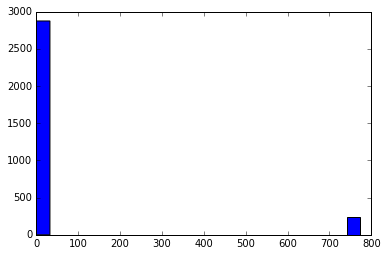

In [33]:
incorrect = filter(lambda (x,y,q,r,rv): not rv, train_6)
print len(incorrect)
dists = map(lambda (x,y,q,r,rv): distance(r, 6), incorrect)
dists.sort()
plt.hist(dists, bins=24);

In [34]:
print len(train_6)
train_6 = filter(lambda (x,y,q,r,rv): rv or (not rv and (np.abs(distance(r, 6)) < 0.01)), train_6)
print len(train_6)

3149
2915


### class 8

In [14]:
print len(train_8)
train_8 = filter(lambda (x,y,q,r,rv): rv or (not rv and (np.abs(distance(r, 8)) < 0.01)), train_8)
print len(train_8)

5809
5809


### class 3

In [10]:
print len(train_3)
train_3 = filter(lambda (x,y,q,r,rv): rv or (not rv and (np.abs(distance(r, 3)) < 0.01)), train_3)
print len(train_3)

3060
1893


### class 5

3652


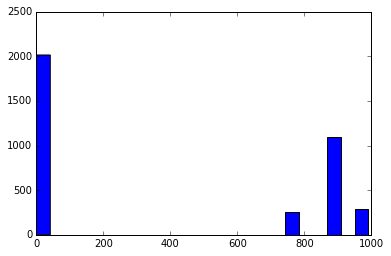

In [26]:
incorrect = filter(lambda (x,y,q,r,rv): not rv, train_5)
print len(incorrect)
dists = map(lambda (x,y,q,r,rv): distance(r, 5), incorrect)
dists.sort()
plt.hist(dists, bins=24);

In [27]:
print len(train_5)
train_5 = filter(lambda (x,y,q,r,rv): rv or (not rv and (np.abs(distance(r, 5)) < 0.1)), train_5)
print len(train_5)

3653
2015


### class 7

1871


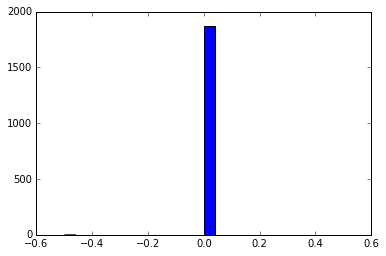

In [12]:
incorrect = filter(lambda (x,y,q,r,rv): not rv, train_7)
print len(incorrect)
dists = map(lambda (x,y,q,r,rv): distance(r, 7), incorrect)
dists.sort()
plt.hist(dists, bins=24);

In [13]:
print len(train_7)
train_7 = filter(lambda (x,y,q,r,rv): rv or (not rv and (np.abs(distance(r, 7)) < 0.1)), train_7)
print len(train_7)

2076
2076


# filter according to EXIF data

### class 1

In [ ]:
train = train_1
train_with_exif = []
for x,y,q,r,rv in progress_iter(train, True):
    tags = exifread.process_file(open(x, 'rb'))
    train_with_exif.append((x,y,q,r,rv,tags))
train_1 = train_with_exif

In [ ]:
print len(train_1)

In [ ]:
print list(set([str(t['Image Make']) for x,y,q,r,rv,t in train_1]))
print list(set([str(t['Image Model']) for x,y,q,r,rv,t in train_1]))

In [ ]:
c = 1
c1 = lambda t: 'EXIF ExifImageWidth' in t
c2 = lambda t: 'EXIF ExifImageLength' in t
c3 = lambda t: distance((int(str(t['EXIF ExifImageWidth'])), int(str(t['EXIF ExifImageLength']))), c) < 0.1
cond = [
    lambda t: 'Image Make' in t and str(t['Image Make']) in ['Huawei', 'LGE'],
    lambda t: 'Image Model' in t and str(t['Image Model']) in ['Nexus 5X', 'Nexus 6P'],
#     lambda t: c1(t) and c2(t) and c3(t),
#     lambda t: 'Image Orientation' in t and str(t['Image Orientation']) == 'Horizontal (normal)'
]
all_cond = lambda (x,y,q,r,rv,t): all(map(lambda c: c(t), cond))
print len(filter(all_cond, train_1))

In [ ]:
print len(train_1)
train_1 = filter(all_cond, train_1)
print len(train_1)

### class 0

In [ ]:
train = train_0
train_with_exif = []
for x,y,q,r,rv in progress_iter(train, True):
    tags = exifread.process_file(open(x, 'rb'))
    train_with_exif.append((x,y,q,r,rv,tags))
train_0 = train_with_exif

In [ ]:
c = 0
c1 = lambda t: 'EXIF ExifImageWidth' in t
c2 = lambda t: 'EXIF ExifImageLength' in t
c3 = lambda t: np.abs(distance((int(str(t['EXIF ExifImageWidth'])), int(str(t['EXIF ExifImageLength']))), c)) < 0.01
cond = [
    lambda t: str(t['Image Make']) == 'HTC',
    lambda t: str(t['Image Model']) == 'HTC One',
    lambda t: c1(t) and c2(t) and c3(t),
    lambda t: 'Image Orientation' in t and str(t['Image Orientation']) == 'Horizontal (normal)'
]
all_cond = lambda (x,y,q,r,rv,t): all(map(lambda c: c(t), cond))
print len(filter(all_cond, train_0))

In [ ]:
print len(train_0)
train_0 = filter(all_cond, train_0)
print len(train_0)

### class 9

In [ ]:
train = train_9
train_with_exif = []
for x,y,q,r,rv in progress_iter(train, True):
    tags = exifread.process_file(open(x, 'rb'))
    train_with_exif.append((x,y,q,r,rv,tags))
train_9 = train_with_exif

In [ ]:
c = 9

def f(v):
    return float(str(v).replace(', 0]', '').replace('[', ''))

c1 = lambda t: 'EXIF ExifImageWidth' in t
c2 = lambda t: 'EXIF ExifImageLength' in t
c3 = lambda t: np.abs(distance((f(t['EXIF ExifImageWidth']), f(t['EXIF ExifImageLength'])), c)) < 0.1
cond = [
    lambda t: 'Image Make' in t and str(t['Image Make']) == 'Apple',
    lambda t: 'Image Model' in t and str(t['Image Model']) == 'iPhone 6',
    lambda t: 'EXIF LensMake' in t and str(t['EXIF LensMake']) == 'Apple',
    lambda t: 'EXIF LensModel' in t and str(t['EXIF LensModel']) == 'iPhone 6 back camera 4.15mm f/2.2',
    lambda t: c1(t) and c2(t) and c3(t),
#     lambda t: 'Image Orientation' in t and str(t['Image Orientation']) == 'Horizontal (normal)'
]
all_cond = lambda (x,y,q,r,rv,t): all(map(lambda c: c(t), cond))
print len(filter(all_cond, train_9))

### class 2

In [11]:
train = train_2
train_with_exif = []
for x,y,q,r,rv in progress_iter(train, True):
    tags = exifread.process_file(open(x, 'rb'))
    train_with_exif.append((x,y,q,r,rv,tags))
train_2 = train_with_exif

A Jupyter Widget

In [14]:
c = 2
c1 = lambda t: 'EXIF ExifImageWidth' in t
c2 = lambda t: 'EXIF ExifImageLength' in t
c3 = lambda t: np.abs(distance((float(str(t['EXIF ExifImageWidth'])), float(str(t['EXIF ExifImageLength']))), c)) < 0.01
cond = [
    lambda t: 'Image Make' in t and str(t['Image Make']) == 'Motorola',
    lambda t: 'Image Model' in t and str(t['Image Model']) == 'XT1080',
    lambda t: c1(t) and c2(t) and c3(t),
#     lambda t: 'Image Orientation' in t and str(t['Image Orientation']) == 'Horizontal (normal)'
]
all_cond = lambda (x,y,q,r,rv,t): all(map(lambda c: c(t), cond))
print len(filter(all_cond, train_2))

5355


In [15]:
print len(train_2)
train_2 = filter(all_cond, train_2)
print len(train_2)

5355
5355


### class 6

In [36]:
train = train_6
train_with_exif = []
for x,y,q,r,rv in progress_iter(train, True):
    tags = exifread.process_file(open(x, 'rb'))
    train_with_exif.append((x,y,q,r,rv,tags))
train_6 = train_with_exif

A Jupyter Widget

In [38]:
def f(v):
    return float(str(v).replace(', 0]', '').replace('[', ''))

In [39]:
c = 6
c1 = lambda t: 'EXIF ExifImageWidth' in t
c2 = lambda t: 'EXIF ExifImageLength' in t
c3 = lambda t: np.abs(distance((f(t['EXIF ExifImageWidth']), f(t['EXIF ExifImageLength'])), c)) < 0.1
cond = [
    lambda t: 'Image Make' in t and str(t['Image Make']).lower() == 'samsung',
    lambda t: 'Image Model' in t and str(t['Image Model']) in ['GT-I9505', 'SCH-I545', 'GT-I9500'],
    lambda t: c1(t) and c2(t) and c3(t),
#     lambda t: 'Image Orientation' in t and str(t['Image Orientation']) == 'Horizontal (normal)'
]
all_cond = lambda (x,y,q,r,rv,t): all(map(lambda c: c(t), cond))
print len(filter(all_cond, train_6))

2912


### class 8

In [16]:
train = train_8
train_with_exif = []
for x,y,q,r,rv in progress_iter(train, True):
    try:
        tags = exifread.process_file(open(x, 'rb'))
        train_with_exif.append((x,y,q,r,rv,tags))
    except:
        pass
train_8 = train_with_exif

A Jupyter Widget

No handlers could be found for logger "exifread"


In [17]:
c = 8

def f(v):
    return float(str(v).replace(', 0]', '').replace('[', ''))

c1 = lambda t: 'EXIF ExifImageWidth' in t
c2 = lambda t: 'EXIF ExifImageLength' in t
c3 = lambda t: np.abs(distance((f(t['EXIF ExifImageWidth']), f(t['EXIF ExifImageLength'])), c)) < 0.01
cond = [
    lambda t: 'Image Make' in t and str(t['Image Make']) == 'Apple',
    lambda t: 'Image Model' in t and str(t['Image Model']) == 'iPhone 4S',
    lambda t: 'EXIF LensMake' in t and str(t['EXIF LensMake']) == 'Apple',
    lambda t: 'EXIF LensModel' in t and str(t['EXIF LensModel']) == 'iPhone 4S back camera 4.28mm f/2.4',
    lambda t: c1(t) and c2(t) and c3(t),
#     lambda t: 'Image Orientation' in t and str(t['Image Orientation']) == 'Horizontal (normal)'
]
all_cond = lambda (x,y,q,r,rv,t): all(map(lambda c: c(t), cond))
print len(filter(all_cond, train_8))

4596


In [18]:
print len(train_8)
train_8 = filter(all_cond, train_8)
print len(train_8)

5807
4596


### class 3

In [11]:
train = train_3
train_with_exif = []
for x,y,q,r,rv in progress_iter(train, True):
    try:
        tags = exifread.process_file(open(x, 'rb'))
        train_with_exif.append((x,y,q,r,rv,tags))
    except:
        pass
train_3 = train_with_exif

A Jupyter Widget

In [12]:
c = 3
c1 = lambda t: 'EXIF ExifImageWidth' in t
c2 = lambda t: 'EXIF ExifImageLength' in t
c3 = lambda t: distance((float(str(t['EXIF ExifImageWidth'])), float(str(t['EXIF ExifImageLength']))), c) < 0.1
cond = [
    lambda t: 'Image Make' in t and str(t['Image Make']) == 'motorola',
    lambda t: 'Image Model' in t and str(t['Image Model']) == 'Nexus 6',
    lambda t: c1(t) and c2(t) and c3(t),
#     lambda t: 'Image Orientation' in t and str(t['Image Orientation']) == 'Horizontal (normal)'
]
all_cond = lambda (x,y,q,r,rv,t): all(map(lambda c: c(t), cond))
print len(filter(all_cond, train_3))

1804


In [13]:
print len(train_3)
train_3 = filter(all_cond, train_3)
print len(train_3)

1893
1804


### class 5

In [28]:
train = train_5
train_with_exif = []
for x,y,q,r,rv in progress_iter(train, True):
    try:
        tags = exifread.process_file(open(x, 'rb'))
        train_with_exif.append((x,y,q,r,rv,tags))
    except:
        pass
train_5 = train_with_exif

A Jupyter Widget

In [29]:
c = 5

def f(v):
    return float(str(v).replace(', 0]', '').replace('[', ''))

c1 = lambda t: 'EXIF ExifImageWidth' in t
c2 = lambda t: 'EXIF ExifImageLength' in t
c3 = lambda t: distance((f(t['EXIF ExifImageWidth']), f(t['EXIF ExifImageLength'])), c) < 0.1
cond = [
    lambda t: 'Image Make' in t and str(t['Image Make']).lower() == 'samsung',
    lambda t: 'Image Model' in t and str(t['Image Model']) in ['SAMSUNG-SM-N900A', 'SM-N9005'],
    lambda t: c1(t) and c2(t) and c3(t),
#     lambda t: 'Image Orientation' in t and str(t['Image Orientation']) == 'Horizontal (normal)'
]
all_cond = lambda (x,y,q,r,rv,t): all(map(lambda c: c(t), cond))
print len(filter(all_cond, train_5))

2015


### class 7

In [14]:
train = train_7
train_with_exif = []
for x,y,q,r,rv in progress_iter(train, True):
    try:
        tags = exifread.process_file(open(x, 'rb'))
        train_with_exif.append((x,y,q,r,rv,tags))
    except:
        pass
train_7 = train_with_exif

A Jupyter Widget

In [17]:
c = 7

def f(v):
    return float(str(v).replace(', 0]', '').replace('[', ''))

c1 = lambda t: 'EXIF ExifImageWidth' in t
c2 = lambda t: 'EXIF ExifImageLength' in t
c3 = lambda t: np.abs(distance((f(t['EXIF ExifImageWidth']), f(t['EXIF ExifImageLength'])), c)) < 0.1
cond = [
    lambda t: 'Image Make' in t and str(t['Image Make']) == 'SONY',
    lambda t: 'Image Model' in t and str(t['Image Model']) == 'NEX-7',
    lambda t: c1(t) and c2(t) and c3(t),
#     lambda t: 'Image Orientation' in t and str(t['Image Orientation']) == 'Horizontal (normal)'
]
all_cond = lambda (x,y,q,r,rv,t): all(map(lambda c: c(t), cond))
print len(filter(all_cond, train_7))

1328


In [18]:
print len(train_7)
train_7 = filter(all_cond, train_7)
print len(train_7)

2076
1328


# crop and save blocks to disk

In [19]:
BLOCK_SIZE = 48
crop_size = 1024

### class 1

In [ ]:
c = 1
class_train = train_1[:N_IMAGES_NEEDED[c]]
N_BLOCKS = int(np.round(len(class_train)/float(BLOCK_SIZE)))
print '{0} blocks ...'.format(N_BLOCKS)

RNG(seed=9999 + c).shuffle(class_train)

class_blocks = []
for _ in xrange(N_BLOCKS):
    class_blocks.append([])
pos = 0
N_IMAGES_PER_ANDREAS_BLOCK = []
for x,_,_,_,_,_ in progress_iter(class_train, True):
    x = Image.open(x)
    w = x.size[0]
    h = x.size[1]
    x = x.crop((w/2-crop_size/2, h/2-crop_size/2,
                w/2+crop_size/2, h/2+crop_size/2))
    class_blocks[pos % N_BLOCKS].append(np.asarray(x, dtype=np.uint8))
    pos += 1
for b in xrange(N_BLOCKS):
    X_block = np.asarray(class_blocks[b], dtype=np.uint8)
    N_IMAGES_PER_ANDREAS_BLOCK.append(len(X_block))
    np.save('../data/X_andreas_{0}_{1}.npy'.format(c, b), X_block)
print N_IMAGES_PER_ANDREAS_BLOCK

### class 0

In [ ]:
c = 0
class_train = train_0

RNG(seed=9999 + c).shuffle(class_train)
class_train = class_train[:N_IMAGES_NEEDED[c]]
print len(class_train)

In [20]:
def make_blocks(class_train, c, b_start=0):
    N_BLOCKS = int(np.round(len(class_train)/float(BLOCK_SIZE)))
    print '{0} blocks ...'.format(N_BLOCKS)
    
    class_blocks = []
    for _ in xrange(N_BLOCKS):
        class_blocks.append([])
    pos = 0
    N_IMAGES_PER_ANDREAS_BLOCK = []
    for x,_,_,_,_,_ in progress_iter(class_train, True):
        x = Image.open(x)
        w = x.size[0]
        h = x.size[1]
        x = x.crop((w/2-crop_size/2, h/2-crop_size/2,
                    w/2+crop_size/2, h/2+crop_size/2))
        class_blocks[pos % N_BLOCKS].append(np.asarray(x, dtype=np.uint8))
        pos += 1
    for b in xrange(N_BLOCKS):
        X_block = np.asarray(class_blocks[b], dtype=np.uint8)
        N_IMAGES_PER_ANDREAS_BLOCK.append(len(X_block))
        np.save('../data/X_andreas_{0}_{1}.npy'.format(c, b + b_start), X_block)
    print N_IMAGES_PER_ANDREAS_BLOCK

In [ ]:
make_blocks(class_train[:800], 0, 0)

In [ ]:
make_blocks(class_train[800:1600], 0, 17)

In [ ]:
make_blocks(class_train[1600:2400], 0, 34)

In [ ]:
make_blocks(class_train[2400:3200], 0, 51)

In [ ]:
make_blocks(class_train[3200:], 0, 68)

### class 9

In [123]:
c = 9
class_train = train_9
class_train.sort(key=lambda (x,y,q,r,rv,t): -q)
class_train = class_train[:N_IMAGES_NEEDED[c]]

RNG(seed=9999 + c).shuffle(class_train)
print len(class_train)

3734


In [124]:
make_blocks(class_train[:960], c, 0)
make_blocks(class_train[960:2*960], c, 20)
make_blocks(class_train[2*960:3*960], c, 40)
make_blocks(class_train[3*960:], c, 60)

20 blocks ...


A Jupyter Widget


[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
20 blocks ...


A Jupyter Widget


[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
20 blocks ...


A Jupyter Widget


[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
18 blocks ...


A Jupyter Widget


[48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47]


### class 2

In [16]:
c = 2
class_train = train_2
class_train.sort(key=lambda (x,y,q,r,rv,t): -q)
class_train = class_train[:N_IMAGES_NEEDED[c]]

RNG(seed=9999 + c).shuffle(class_train)
print len(class_train)

4026


In [ ]:
make_blocks(class_train[:960], c, 0)
make_blocks(class_train[960:2*960], c, 20)
make_blocks(class_train[2*960:3*960], c, 40)
make_blocks(class_train[3*960:], c, 60)

### class 6

In [41]:
c = 6
class_train = train_6
class_train.sort(key=lambda (x,y,q,r,rv,t): -q)
class_train = class_train[:N_IMAGES_NEEDED[c]]

RNG(seed=9999 + c).shuffle(class_train)
print len(class_train)

2915


In [ ]:
make_blocks(class_train[:960], c, 0)
make_blocks(class_train[960:2*960], c, 20)
make_blocks(class_train[2*960:3*960], c, 40)
make_blocks(class_train[3*960:], c, 60)

### class 8

In [19]:
c = 8
class_train = train_8
class_train.sort(key=lambda (x,y,q,r,rv,t): -q)
class_train = class_train[:N_IMAGES_NEEDED[c]]

RNG(seed=9999 + c).shuffle(class_train)
print len(class_train)

3931


In [24]:
make_blocks(class_train[:960], c, 0)
make_blocks(class_train[960:2*960], c, 20)
make_blocks(class_train[2*960:3*960], c, 40)
make_blocks(class_train[3*960:], c, 60)

20 blocks ...


A Jupyter Widget


[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
20 blocks ...


A Jupyter Widget


[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
20 blocks ...


A Jupyter Widget


[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
22 blocks ...


A Jupyter Widget


[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47]


### class 3

In [16]:
c = 3
class_train = train_3
class_train.sort(key=lambda (x,y,q,r,rv,t): -q)
class_train = class_train[:N_IMAGES_NEEDED[c]]

RNG(seed=9999 + c).shuffle(class_train)
print len(class_train)

1804


In [17]:
make_blocks(class_train[:960], c, 0)
make_blocks(class_train[960:], c, 20)

20 blocks ...


A Jupyter Widget


[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
18 blocks ...


A Jupyter Widget


[47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 46]


### class 5

In [31]:
c = 5
class_train = train_5
class_train.sort(key=lambda (x,y,q,r,rv,t): -q)
class_train = class_train[:N_IMAGES_NEEDED[c]]

RNG(seed=9999 + c).shuffle(class_train)
print len(class_train)

2015


In [32]:
make_blocks(class_train[:960], c, 0)
make_blocks(class_train[960:2*960], c, 20)
make_blocks(class_train[2*960:], c, 40)

20 blocks ...


A Jupyter Widget


[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
20 blocks ...


A Jupyter Widget


[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
2 blocks ...


A Jupyter Widget


[48, 47]


### class 7

In [21]:
c = 7
class_train = train_7
class_train.sort(key=lambda (x,y,q,r,rv,t): -q)
class_train = class_train[:N_IMAGES_NEEDED[c]]

RNG(seed=9999 + c).shuffle(class_train)
print len(class_train)

1328


In [22]:
make_blocks(class_train[:960], c, 0)
make_blocks(class_train[960:], c, 20)

20 blocks ...


A Jupyter Widget


[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
8 blocks ...


A Jupyter Widget


[46, 46, 46, 46, 46, 46, 46, 46]
